In [0]:
import numpy as np
from matplotlib import pyplot as plt
import math
import copy

In [0]:
def fft(func_disc, invert=False):
  points_size = len(func_disc)
  if points_size == 1:
    return copy.deepcopy(func_disc)
  
  a_0 = fft(func_disc[0::2], invert)
  a_1 = fft(func_disc[1::2], invert)
  angle = 2 * math.pi / points_size
  
  angle = angle if invert else -angle
  
  w = complex(1, 0)
  wn = complex(math.cos(angle), math.sin(angle))
  
  transformed_func = [complex(0, 0)] * len(func_disc)
  for i in range(points_size // 2):
    transformed_func[i] = a_0[i] + w * a_1[i]
    transformed_func[i + points_size // 2] = a_0[i] - w * a_1[i]
    if invert:
      transformed_func[i] /= 2
      transformed_func[i + points_size // 2] /= 2
    w = w * wn
  return transformed_func
    

In [0]:
def prepare_discretesation(function, discretesation):
  function_discretesation = np.array([function(x) for x in discretesation] + [0] * 28)
  return function_discretesation

def sin(x):
  return math.sin(x)

def x(x):
  return x

def x_squared(x):
  return x ** 2

def sin_squared(x):
  return math.sin(x ** 2)

def sin_x(x):
  return math.sin(x) / (x + 1e-18)


In [0]:
def do_plot(function):
  discretesation = np.arange(0, 10, 0.1)
  fft_forward = fft(prepare_discretesation(function, discretesation))
  x = [e for e in discretesation] + [0] * 28
  plt.scatter(x, fft(fft_forward, True))
  plt.scatter(x, fft(fft_forward[:127] + [0], True))
  plt.scatter(x, fft(fft_forward[:126] + [0] * 2, True))

# Основная часть
Число 28 прибавляется для того, чтобы привести размер массива к степени двойки

## X

In [338]:
do_plot(x)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


## X^2

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


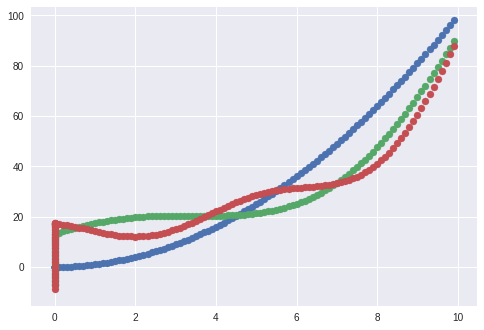

In [339]:
do_plot(x_squared)


## SIN(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


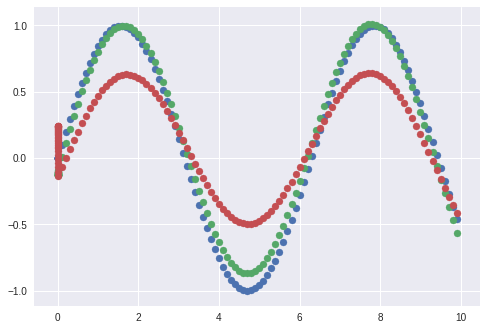

In [340]:
do_plot(sin)


## SIN(X^2)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


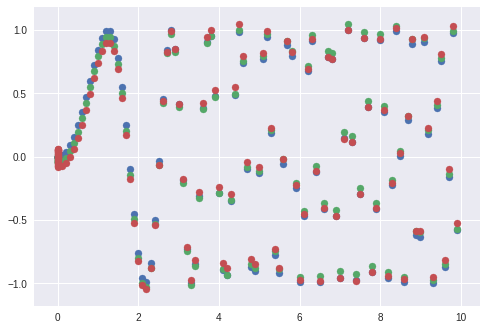

In [341]:
do_plot(sin_squared)

## SIN(X) / X

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


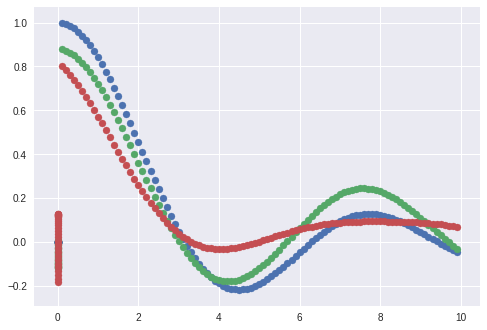

In [342]:
do_plot(sin_x)

Различия видны уже при занулении одного коэффициента